In [48]:
import numpy as np
import xarray as xr
import gsw 
import pandas as pd
import matplotlib.pyplot as plt 
import os
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import PchipInterpolator

%matplotlib inline

In [89]:
data_dir = '/Users/dhruvbalwada/work_root/sogos/data/raw/Argo/Profiles/'
#files = os.listdir(data_dir,'S*.nc')
files = glob.glob(data_dir+'S*.nc')
nfiles = len(files)

In [64]:
std_levels = np.linspace(0,2000,1001)

In [39]:
ds_final = xr.Dataset()

for count, file in enumerate(files):
    
    # run a counter
    if np.mod(count, 500)==0:
        print(count)
                             
    ds = xr.open_dataset(file)
    ds = ds.isel(N_PROF=0)
    
    ds_int = xr.Dataset()
    
    ds_int['JULD'] = ds.JULD
    ds_int['LATITUDE'] = ds.LATITUDE
    ds_int['LONGITUDE'] = ds.LONGITUDE
    ds_int['PLATFORM_NUM'] = ds.PLATFORM_NUMBER
    # remove nans
#         if hasattr(ds, 'DOXY_ADJUSTED'):
#             O2 = ds.DOXY_ADJUSTED.where(~np.isnan(ds.DOXY_ADJUSTED), drop=True)
#             P_O2= ds.PRES_ADJUSTED.where(~np.isnan(ds.DOXY_ADJUSTED), drop=True)

#             T = ds.TEMP_ADJUSTED.where(~np.isnan(ds.TEMP_ADJUSTED), drop=True)
#             P_T= ds.PRES_ADJUSTED.where(~np.isnan(ds.TEMP_ADJUSTED), drop=True)

#             S = ds.PSAL_ADJUSTED.where(~np.isnan(ds.PSAL_ADJUSTED), drop=True)
#             P_S= ds.PRES_ADJUSTED.where(~np.isnan(ds.PSAL_ADJUSTED), drop=True)
#         else:
#             continue


#         # Check to make sure that there are some good data points
#         if len(P_O2)>3 and len(P_T)>3 and len(P_S)>3:

#             # get rid of repeated pressures
#             O2 = O2.groupby(P_O2).mean()
#             P_O2 = P_O2.groupby(P_O2).mean()

#             T = T.groupby(P_T).mean()
#             P_T = P_T.groupby(P_T).mean()

#             S = S.groupby(P_S).mean()
#             P_S = P_S.groupby(P_S).mean()

#             # interpolate in pressure
#             f_O2 = PchipInterpolator(P_O2, O2,extrapolate=False)
#             f_T  = PchipInterpolator(P_T, T,extrapolate=False)
#             f_S = PchipInterpolator(P_S, S,extrapolate=False)

#             O2_int = f_O2(std_levels)
#             T_int = f_T(std_levels)
#             S_int = f_S(std_levels)

#             ds_int['TEMP'] = xr.DataArray(T_int, dims=['PRES'], 
#                                           coords={'PRES':std_levels})
#             ds_int['PSAL'] = xr.DataArray(S_int, dims=['PRES'], 
#                                           coords={'PRES':std_levels})
#             ds_int['DOXY'] = xr.DataArray(O2_int, dims=['PRES'], 
#                                           coords={'PRES':std_levels})

    ds_final = xr.concat([ds_final, ds_int], dim='N_PROF')

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500


In [54]:
import matplotlib.path as mpath
import os.path as op

In [55]:
data_dir ="/Users/dhruvbalwada/OneDrive/sogos_data/"
topo = xr.open_dataarray(
    data_dir+"data/processed/ETOPO1_Ice_g_gmt4_coarsened5.nc"
)
pf = pd.read_csv(
    op.join(data_dir+"data/processed/fronts/pf.txt"),
    delim_whitespace=True,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)
saf = pd.read_csv(
    op.join(data_dir+"data/processed/fronts/saf.txt"),
    delim_whitespace=True,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)
saccf = pd.read_csv(
    op.join(data_dir+"data/processed/fronts/saccf.txt"),
    delim_whitespace=True,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)
sbdy =  pd.read_csv(
    op.join(data_dir+"data/processed/fronts/sbdy.txt"),
    delim_whitespace=True,
    nrows=1079,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)

Text(0.5, 1.0, 'Argo Floats ')

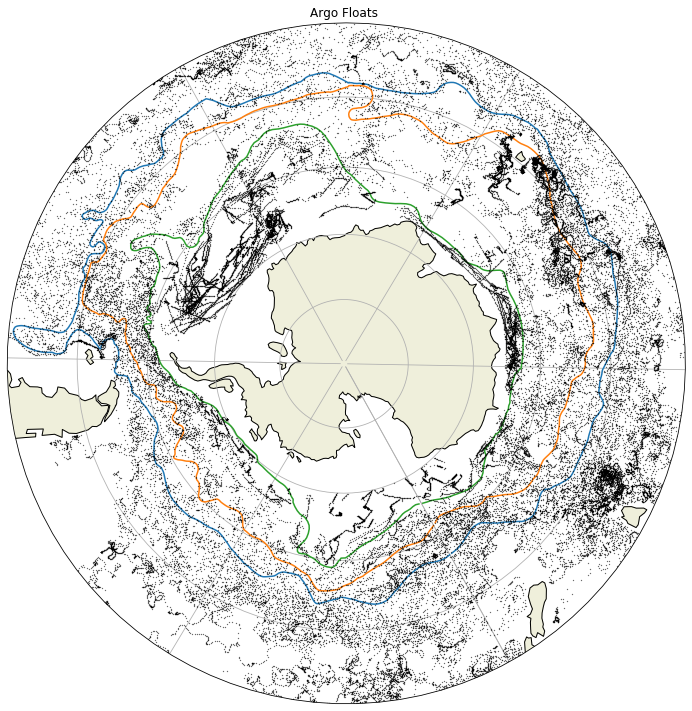

In [62]:
# Where was the cruise?
fig = plt.figure(figsize=(12, 10))
fig.set_tight_layout(True)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo(central_longitude=29))
ax.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())

# make a circular boundary
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# Some decoration
ax.add_feature(cfeature.LAND)
ax.coastlines()
# ax.add_feature(cfeature.OCEAN)
ax.gridlines()

# topo.sel(y=slice(-90, -40)).plot(levels=[ -2000, -1000, 0],
#     ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.4}
# )

plt.plot(saf.lon, saf.lat, transform=ccrs.PlateCarree())
plt.plot(pf.lon, pf.lat, transform=ccrs.PlateCarree())
plt.plot(saccf.lon, saccf.lat, transform=ccrs.PlateCarree())
plt.plot(sbdy.lon, sbdy.lat, transform=ccrs.PlateCarree())

#ax.plot(lon, lat, transform=ccrs.PlateCarree(), Marker=".", color="k")
plt.plot(ds_final.LONGITUDE, ds_final.LATITUDE,'.', markersize=0.5, color='k',transform=ccrs.PlateCarree() )

plt.title("Argo Floats ")

(array([  36.,   28.,   50.,  479.,  661., 1316., 2589., 2895., 3235.,
        3701., 3269., 2875., 3133., 4899., 4061., 4362., 5018., 4882.,
        4912., 4221., 2915.]),
 array([731230.16401621, 731541.25603924, 731852.34806228, 732163.44008532,
        732474.53210836, 732785.62413139, 733096.71615443, 733407.80817747,
        733718.90020051, 734029.99222355, 734341.08424658, 734652.17626962,
        734963.26829266, 735274.3603157 , 735585.45233874, 735896.54436177,
        736207.63638481, 736518.72840785, 736829.82043089, 737140.91245392,
        737452.00447696, 737763.0965    ]),
 <a list of 21 Patch objects>)

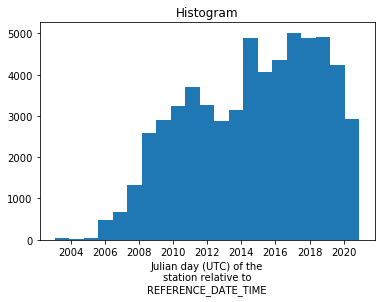

In [63]:
ds_final.JULD.plot.hist(bins=21)

In [65]:
ds_final.to_netcdf('SO_Argo_locations.nc')

In [114]:
#dsD = xr.open_dataset('/Users/dhruvbalwada/work_root/sogos/data/raw/Argo/Profiles/SD5903260_054.nc')
#dsR = xr.open_dataset('/Users/dhruvbalwada/work_root/sogos/data/raw/Argo/Profiles/SR5905062_187.nc')


In [154]:
%%time
ds_final = xr.Dataset()

files_more_profs = []

for count, file in enumerate(files):
    
    # run a counter
    if np.mod(count, 500)==0:
        print(count)
                             
    ds = xr.open_dataset(file)
    #take note if some files have more than one profiles
    if len(ds.N_PROF)>1:
        files_more_profs = files_more_profs + file
    # for now only use the first one 
    ds = ds.isel(N_PROF=0)
    
    
    # remove nans
    if hasattr(ds, 'DOXY_ADJUSTED'):
        ds_int = xr.Dataset()
    
        ds_int['JULD'] = ds.JULD
        ds_int['LATITUDE'] = ds.LATITUDE
        ds_int['LONGITUDE'] = ds.LONGITUDE
        ds_int['PLATFORM_NUM'] = ds.PLATFORM_NUMBER

        O2 = ds.DOXY_ADJUSTED.where(~np.isnan(ds.DOXY_ADJUSTED), drop=True)
        P_O2= ds.PRES_ADJUSTED.where(~np.isnan(ds.DOXY_ADJUSTED), drop=True)

        T = ds.TEMP_ADJUSTED.where(~np.isnan(ds.TEMP_ADJUSTED), drop=True)
        P_T= ds.PRES_ADJUSTED.where(~np.isnan(ds.TEMP_ADJUSTED), drop=True)

        S = ds.PSAL_ADJUSTED.where(~np.isnan(ds.PSAL_ADJUSTED), drop=True)
        P_S= ds.PRES_ADJUSTED.where(~np.isnan(ds.PSAL_ADJUSTED), drop=True)
    else:
        continue

    # Check to make sure that there are some good data points
    if len(P_O2)>3 and len(P_T)>3 and len(P_S)>3:
        
        # get rid of repeated pressures
        O2 = O2.groupby(P_O2).mean()
        P_O2 = P_O2.groupby(P_O2).mean()

        T = T.groupby(P_T).mean()
        P_T = P_T.groupby(P_T).mean()

        S = S.groupby(P_S).mean()
        P_S = P_S.groupby(P_S).mean()

        # interpolate in pressure
        f_O2 = PchipInterpolator(P_O2, O2,extrapolate=False)
        f_T  = PchipInterpolator(P_T, T,extrapolate=False)
        f_S = PchipInterpolator(P_S, S,extrapolate=False)

        O2_int = f_O2(std_levels)
        T_int = f_T(std_levels)
        S_int = f_S(std_levels)

        ds_int['TEMP'] = xr.DataArray(T_int, dims=['PRES'], 
                                      coords={'PRES':std_levels})
        ds_int['PSAL'] = xr.DataArray(S_int, dims=['PRES'], 
                                      coords={'PRES':std_levels})
        ds_int['DOXY'] = xr.DataArray(O2_int, dims=['PRES'], 
                                      coords={'PRES':std_levels})

        ds_final = xr.concat([ds_final, ds_int], dim='N_PROF')

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
CPU times: user 7h 45min 9s, sys: 2h 31min 19s, total: 10h 16min 28s
Wall time: 10h 21min


In [155]:
ds_final

<xarray.Dataset>
Dimensions:       (N_PROF: 45074, PRES: 1001)
Coordinates:
  * PRES          (PRES) float64 0.0 2.0 4.0 6.0 ... 1.996e+03 1.998e+03 2e+03
Dimensions without coordinates: N_PROF
Data variables:
    PLATFORM_NUM  (N_PROF) object b'5903260 ' b'5903256 ' ... b'5903613 '
    JULD          (N_PROF) datetime64[ns] 2011-08-16T03:44:22.000004864 ... 2014-11-03T19:23:23.002071808
    LONGITUDE     (N_PROF) float64 179.5 -142.1 90.27 ... 175.4 -9.28 -24.53
    PSAL          (N_PROF, PRES) float64 nan nan nan 34.21 ... 34.66 nan nan
    TEMP          (N_PROF, PRES) float64 nan nan nan 6.43 ... -0.09784 nan nan
    LATITUDE      (N_PROF) float64 -51.38 -52.35 -59.59 ... -52.38 -61.24 -66.57
    DOXY          (N_PROF, PRES) float64 nan nan nan 297.2 ... 234.4 nan nan

In [156]:
ds_final.to_netcdf('Argo_oxygen.nc')

### Basic Stats

Text(0.5, 1.0, 'Argo Floats with good O2 ')

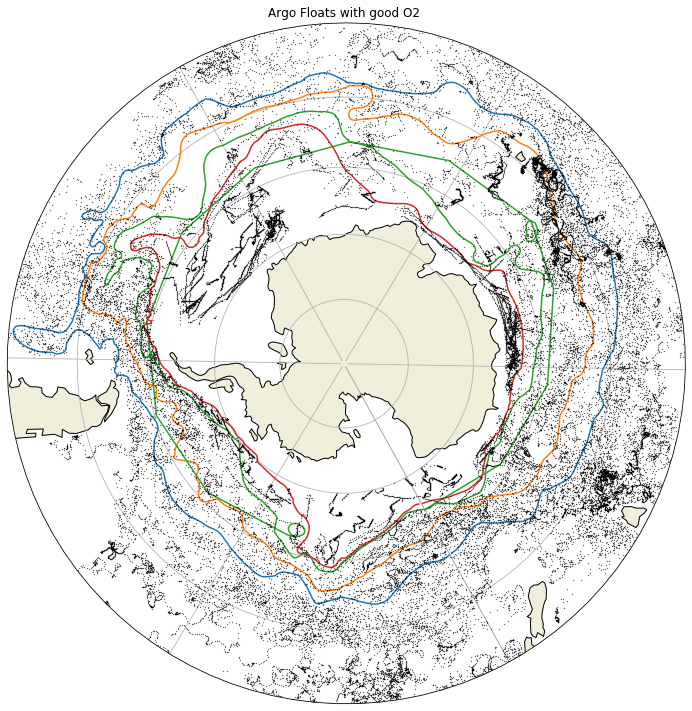

In [236]:
# Where was the cruise?
fig = plt.figure(figsize=(12, 10))
fig.set_tight_layout(True)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo(central_longitude=29))
ax.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())

# make a circular boundary
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# Some decoration
ax.add_feature(cfeature.LAND)
ax.coastlines()
# ax.add_feature(cfeature.OCEAN)
ax.gridlines()

# topo.sel(y=slice(-90, -40)).plot(levels=[ -2000, -1000, 0],
#     ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.4}
# )

plt.plot(saf.lon, saf.lat, transform=ccrs.PlateCarree())
plt.plot(pf.lon, pf.lat, transform=ccrs.PlateCarree())
plt.plot(saccf.lon, saccf.lat, transform=ccrs.PlateCarree())
plt.plot(sbdy.lon, sbdy.lat, transform=ccrs.PlateCarree())

#ax.plot(lon, lat, transform=ccrs.PlateCarree(), Marker=".", color="k")
plt.plot(ds_final.LONGITUDE, ds_final.LATITUDE,'.', markersize=0.5, color='k',transform=ccrs.PlateCarree() )

plt.title("Argo Floats with good O2 ")

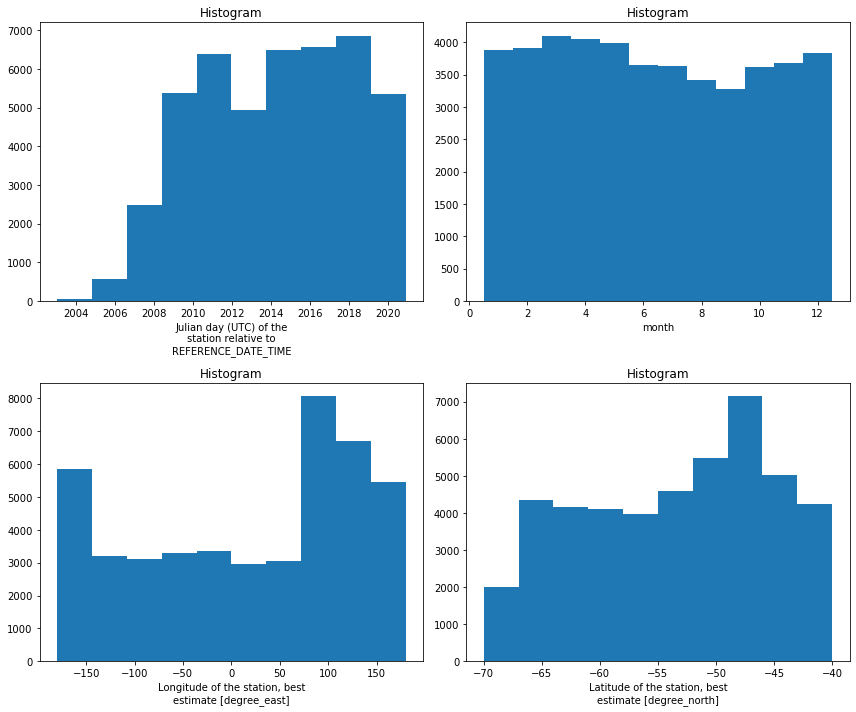

In [184]:
plt.figure(figsize=(12,10))

plt.subplot(221)
ds_final.JULD.plot.hist();

plt.subplot(222)
ds_final.JULD.dt.month.plot.hist(bins=np.linspace(0.5,12.5,13))

plt.subplot(223)
ds_final.LONGITUDE.plot.hist();

plt.subplot(224)
ds_final.LATITUDE.plot.hist();

plt.tight_layout()

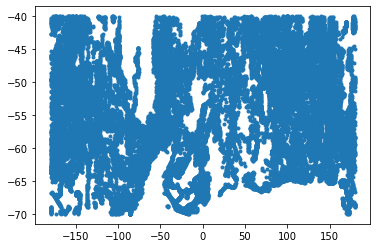

In [359]:
plt.plot(ds_final.LONGITUDE, ds_final.LATITUDE, '.')

### Convert profiles

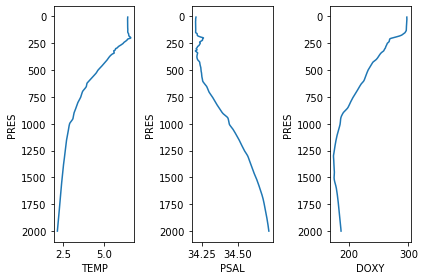

In [190]:
plt.subplot(131)
ds_final.isel(N_PROF=0).TEMP.plot(y='PRES')
plt.gca().invert_yaxis()

plt.subplot(132)
ds_final.isel(N_PROF=0).PSAL.plot(y='PRES')
plt.gca().invert_yaxis()

plt.subplot(133)
ds_final.isel(N_PROF=0).DOXY.plot(y='PRES')
plt.gca().invert_yaxis()

plt.tight_layout()

In [191]:
prof = ds_final.isel(N_PROF=0)

In [195]:
SA = gsw.SA_from_SP(prof.PSAL, prof.PRES, prof.LONGITUDE, prof.LATITUDE)
CT = gsw.CT_from_t(SA, prof.TEMP, prof.PRES)
rho = gsw.sigma0(SA, CT)
O2sol = gsw.O2sol(SA, CT, prof.PRES, prof.LONGITUDE, prof.LATITUDE)
AOU = O2sol - prof.DOXY

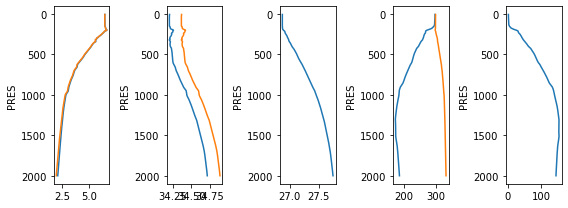

In [201]:
plt.figure(figsize=(8,3))
plt.subplot(151)
ds_final.isel(N_PROF=0).TEMP.plot(y='PRES')
CT.plot(y='PRES')
plt.gca().invert_yaxis()

plt.subplot(152)
ds_final.isel(N_PROF=0).PSAL.plot(y='PRES')
SA.plot(y='PRES')
plt.gca().invert_yaxis()

plt.subplot(153)
rho.plot(y='PRES')
plt.gca().invert_yaxis()

plt.subplot(154)
ds_final.isel(N_PROF=0).DOXY.plot(y='PRES')
O2sol.plot(y='PRES')
plt.gca().invert_yaxis()

plt.subplot(155)
AOU.plot(y='PRES')
plt.gca().invert_yaxis()

plt.tight_layout()

In [207]:
SA = xr.apply_ufunc(gsw.SA_from_SP, 
                   ds_final.PSAL, ds_final.PRES, ds_final.LONGITUDE, ds_final.LATITUDE, 
                   dask='parallelized', output_dtypes=[float,]).rename('SA')
CT = xr.apply_ufunc(gsw.CT_from_t, 
                   SA, ds_final.TEMP, ds_final.PRES, 
                   dask='parallelized', output_dtypes=[float,]).rename('CT')


In [208]:
sigma0 = xr.apply_ufunc(gsw.sigma0, SA, CT, 
                        dask='parallelized', output_dtypes=[float,]).rename('sigma0')

In [525]:
sigma0

<xarray.DataArray 'sigma0' (N_PROF: 45074, PRES: 1001)>
array([[        nan,         nan,         nan, ..., 27.74890466,
        27.74916107, 27.74941629],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ..., 27.85438693,
                nan,         nan]])
Coordinates:
  * PRES     (PRES) float64 0.0 2.0 4.0 6.0 ... 1.996e+03 1.998e+03 2e+03
Dimensions without coordinates: N_PROF

In [210]:
O2sat = xr.apply_ufunc(gsw.O2sol, SA, CT, ds_final.PRES, ds_final.LONGITUDE, ds_final.LATITUDE,
                      dask='parallelized', output_dtypes=[float,]).rename('O2sat')

In [217]:
AOU = (O2sat - ds_final.DOXY).rename('AOU')

In [218]:
AOU

<xarray.DataArray 'AOU' (N_PROF: 45074, PRES: 1001)>
array([[         nan,          nan,          nan, ..., 144.08713903,
        144.07167887, 144.05642445],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ..., 116.29764245,
                 nan,          nan]])
Coordinates:
  * PRES     (PRES) float64 0.0 2.0 4.0 6.0 ... 1.996e+03 1.998e+03 2e+03
Dimensions without coordinates: N_PROF

In [219]:
temp = xr.merge([SA, CT, sigma0, O2sat, AOU])

In [220]:
ds_AOU = xr.merge([ds_final, temp])

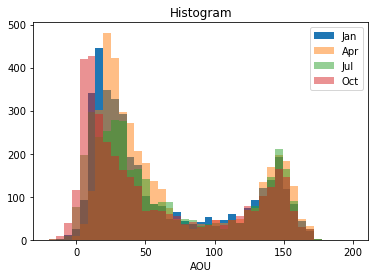

In [240]:
ds_AOU.AOU.where(ds_AOU.JULD.dt.month==1, drop=True).sel(PRES=200, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), label='Jan');
ds_AOU.AOU.where(ds_AOU.JULD.dt.month==4, drop=True).sel(PRES=200, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), alpha=0.5, label='Apr');
ds_AOU.AOU.where(ds_AOU.JULD.dt.month==7, drop=True).sel(PRES=200, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), alpha=0.5, label='Jul');
ds_AOU.AOU.where(ds_AOU.JULD.dt.month==10, drop=True).sel(PRES=200, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), alpha=0.5, label='Oct');
plt.legend()

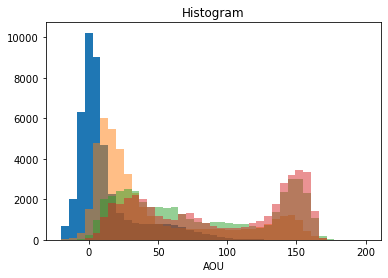

In [234]:
ds_AOU.AOU.sel(PRES=50, method='nearest').plot.hist(bins=np.linspace(-20, 200,40));
ds_AOU.AOU.sel(PRES=150, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), alpha=0.5);
ds_AOU.AOU.sel(PRES=300, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), alpha=0.5);
ds_AOU.AOU.sel(PRES=400, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), alpha=0.5);

### Compare to fronts and analysis relative to MLD

In [241]:
mSSH = xr.open_dataset('/Users/dhruvbalwada/work_root/sogos/data/means_SSH_1993_2017.nc')

In [272]:
mSSH

<xarray.Dataset>
Dimensions:    (latitude: 240, longitude: 1440)
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... -30.375 -30.125
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
Data variables:
    ADT        (latitude, longitude) float64 nan nan nan ... 0.5383 0.537 0.5361
    EKE        (latitude, longitude) float64 nan nan nan ... 0.01533 0.0152
    MKE        (latitude, longitude) float64 nan nan nan ... 0.0009368 0.001232

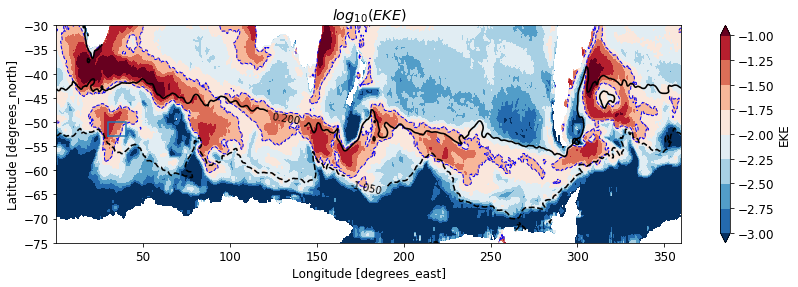

In [702]:
plt.figure(figsize=(14,4))
np.log10(mSSH.EKE).plot.contourf(levels=9, vmin=-3., vmax=-1, cmap='RdBu_r')
np.log10(mSSH.EKE).plot.contour(levels=[-1.75], colors='b', linewidths=1.)
#mSSH.ADT.plot.contour(levels=11, linewidths=0.6, colors='k')
CS = mSSH.ADT.plot.contour(levels=[-1.05, 0.2], linewidths=1.6, colors='k')

plt.clabel(CS, CS.levels, inline=True, fontsize=10)

plt.plot([30,40, 40, 30, 30],[-53,-53,-50,-50,-53])
         
plt.ylim(-75,-30)
plt.title('$log_{10}(EKE)$')
plt.savefig('ACC_map.png')

In [ ]:
# interpolate SSH and EKE on float positions 
# 

In [367]:
def SSH_locator(lon, lat):
    if lon<0:
        lon = lon+360
    return mSSH.ADT.sel(longitude=lon, latitude=lat, method='nearest').values

def EKE_locator(lon, lat):
    if lon<0:
        lon = lon+360
    return mSSH.EKE.sel(longitude=lon, latitude=lat, method='nearest').values

In [368]:
ADT = xr.apply_ufunc(SSH_locator, 
                     ds_AOU.LONGITUDE, ds_AOU.LATITUDE,
                     vectorize=True)

In [369]:
EKE = xr.apply_ufunc(EKE_locator, 
                     ds_AOU.LONGITUDE, ds_AOU.LATITUDE,
                     dask='parallelized', output_dtypes=[float],
                     vectorize=True).rename('EKE')

In [476]:
def calc_MLD(sigma, pres):
    ds = xr.DataArray(sigma, dims=['PRES'], coords={'PRES':std_levels})
    # ds is an xarray with density
    if ~np.isnan(ds.sel(PRES=10, method='nearest')):
    
        MLD = ds.PRES.where( (ds - ds.sel(PRES=10, method='nearest'))<0.03,
                        drop=True).max('PRES').rename('MLD')
    else:
        MLD = np.nan
    return MLD

In [370]:
ds_AOU['ADT'] = ADT
ds_AOU['EKE'] = EKE

In [475]:
MLD = xr.apply_ufunc(calc_MLD, ds_AOU.sigma0, ds_AOU.PRES,
                     input_core_dims=[['PRES'],['PRES']]
                     ,vectorize=True)

In [477]:
ds_AOU['MLD'] = MLD

In [706]:
def AOU_below_ML(AOU, MLD, PRES):
    ds = xr.DataArray(AOU, dims=['PRES'], coords={'PRES':PRES})
    
    if np.logical_and(~np.isnan(MLD), MLD<1500.):
        belowML = np.logical_and(ds.PRES>MLD, ds.PRES<=MLD+250)
        
        
        return ds.where(belowML, drop=True).values
    else:
        return np.nan*np.ones(125)

In [707]:
belowML_AOU = xr.apply_ufunc(AOU_below_ML, 
                             ds_AOU.AOU, 
                             ds_AOU.MLD,
                             ds_AOU.PRES, 
                             input_core_dims=[['PRES'],[],['PRES']], 
                             dask='parallelized' ,
                             output_dtypes=[ds_AOU_ACC.AOU.dtype],
                             output_core_dims=[['PRES_BL']],
                             output_sizes={'PRES_BL':125}, vectorize=True)

In [708]:
ds_AOU = ds_AOU.drop('AOU_below_MLD')

In [709]:
ds_AOU['AOU_below_MLD'] = belowML_AOU

In [710]:
acc_sel = np.logical_and(ds_AOU.ADT<0.2 , ds_AOU.ADT>-1.05)
eke_low_sel = np.log10(ds_AOU.EKE)<-1.75
eke_high_sel = np.log10(ds_AOU.EKE)>=-1.75

In [711]:
ds_AOU_ACC = ds_AOU.where(acc_sel, drop=True)

In [712]:
ds_AOU_ACC_low = ds_AOU.where(np.logical_and(acc_sel, eke_low_sel), drop=True)
ds_AOU_ACC_high = ds_AOU.where(np.logical_and(acc_sel, eke_high_sel), drop=True)

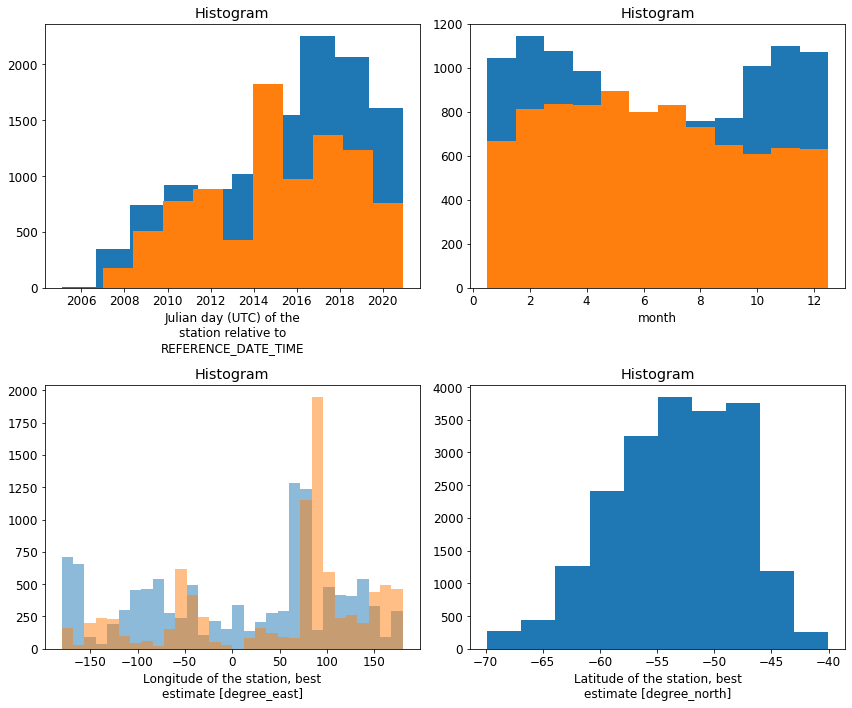

In [684]:
plt.figure(figsize=(12,10))

plt.subplot(221)
ds_AOU_ACC_low.JULD.plot.hist();
ds_AOU_ACC_high.JULD.plot.hist();

plt.subplot(222)
ds_AOU_ACC_low.JULD.dt.month.plot.hist(bins=np.linspace(0.5,12.5,13))
ds_AOU_ACC_high.JULD.dt.month.plot.hist(bins=np.linspace(0.5,12.5,13))

plt.subplot(223)
#ds_AOU_ACC.LONGITUDE.plot.hist(bins=np.linspace(-180,180,11));
ds_AOU_ACC_low.LONGITUDE.plot.hist(bins=np.linspace(-180,180,31), alpha=0.5);
ds_AOU_ACC_high.LONGITUDE.plot.hist(bins=np.linspace(-180,180,31), alpha=0.5);

plt.subplot(224)
ds_AOU_ACC.LATITUDE.plot.hist();

plt.tight_layout()

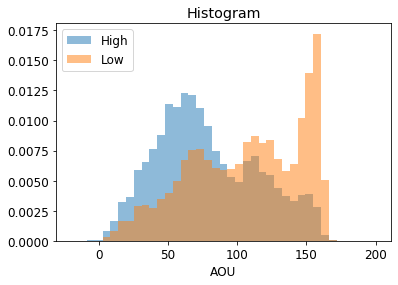

In [713]:
#ds_AOU_ACC.AOU.sel(PRES=350, method='nearest').plot.hist(bins=np.linspace(-20, 200,40));
ds_AOU_ACC_high.AOU.sel(PRES=350, method='nearest').plot.hist(
    bins=np.linspace(-20, 200,40),alpha=0.5, density=True, label='High');
ds_AOU_ACC_low.AOU.sel(PRES=350, method='nearest').plot.hist(
    bins=np.linspace(-20, 200,40), alpha=0.5, density=True, label='Low');
plt.legend()

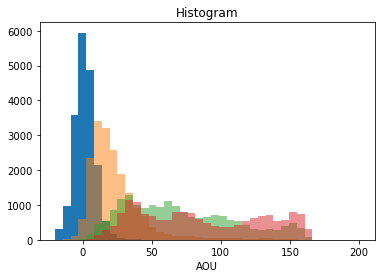

In [330]:
ds_AOU_ACC.AOU.sel(PRES=50, method='nearest').plot.hist(bins=np.linspace(-20, 200,40));
ds_AOU_ACC.AOU.sel(PRES=150, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), alpha=0.5);
ds_AOU_ACC.AOU.sel(PRES=300, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), alpha=0.5);
ds_AOU_ACC.AOU.sel(PRES=400, method='nearest').plot.hist(bins=np.linspace(-20, 200,40), alpha=0.5);

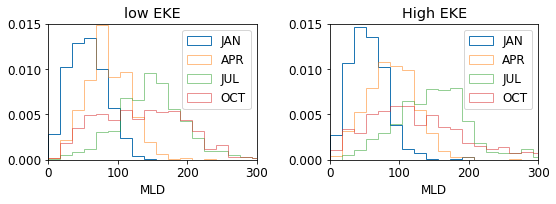

In [686]:
plt.figure(figsize=(8,3))
plt.subplot(121)
ds_AOU_ACC_low.MLD.where(ds_AOU_ACC_low.JULD.dt.month==1, 
                          drop=True).plot.hist(bins=np.linspace(0,500,30), histtype='step',density=True, label='JAN');
ds_AOU_ACC_low.MLD.where(ds_AOU_ACC_low.JULD.dt.month==4,
                          drop=True).plot.hist(bins=np.linspace(0,500,30), histtype='step', density=True, alpha=0.5, label='APR');
ds_AOU_ACC_low.MLD.where(ds_AOU_ACC_low.JULD.dt.month==7, 
                          drop=True).plot.hist(bins=np.linspace(0,500,30), histtype='step', density=True, alpha=0.5, label='JUL');
ds_AOU_ACC_low.MLD.where(ds_AOU_ACC_low.JULD.dt.month==10, 
                          drop=True).plot.hist(bins=np.linspace(0,500,30), histtype='step', density=True, alpha=0.5, label='OCT');
plt.legend()
plt.title('low EKE')
plt.xlim([0,300])
plt.ylim([0, 0.015])

plt.subplot(122)
ds_AOU_ACC_high.MLD.where(ds_AOU_ACC_high.JULD.dt.month==1, 
                          drop=True).plot.hist(bins=np.linspace(0,500,30), histtype='step', density=True, label='JAN');
ds_AOU_ACC_high.MLD.where(ds_AOU_ACC_high.JULD.dt.month==4,
                          drop=True).plot.hist(bins=np.linspace(0,500,30), histtype='step', density=True, alpha=0.5, label='APR');
ds_AOU_ACC_high.MLD.where(ds_AOU_ACC_high.JULD.dt.month==7, 
                          drop=True).plot.hist(bins=np.linspace(0,500,30), histtype='step',density=True,  alpha=0.5, label='JUL');
ds_AOU_ACC_high.MLD.where(ds_AOU_ACC_high.JULD.dt.month==10, 
                          drop=True).plot.hist(bins=np.linspace(0,500,30), histtype='step', density=True, alpha=0.5, label='OCT');
plt.legend()
plt.title('High EKE')
plt.xlim([0,300])
plt.ylim([0, 0.015])

plt.tight_layout()

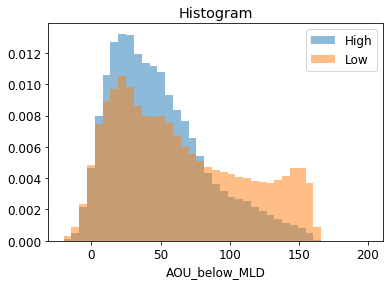

In [714]:
ds_AOU_ACC_high.AOU_below_MLD.plot.hist(
    bins=np.linspace(-20, 200,40),alpha=0.5, density=True, label='High');
ds_AOU_ACC_low.AOU_below_MLD.plot.hist(
    bins=np.linspace(-20, 200,40), alpha=0.5, density=True, label='Low');
plt.legend()

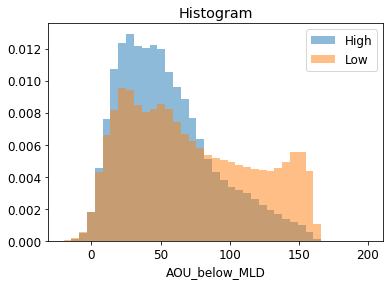

In [715]:
ds_AOU_ACC_high.AOU_below_MLD.isel(PRES_BL=slice(20,205)).plot.hist(
    bins=np.linspace(-20, 200,40),alpha=0.5, density=True, label='High');
ds_AOU_ACC_low.AOU_below_MLD.isel(PRES_BL=slice(20,205)).plot.hist(
    bins=np.linspace(-20, 200,40), alpha=0.5, density=True, label='Low');
plt.legend()

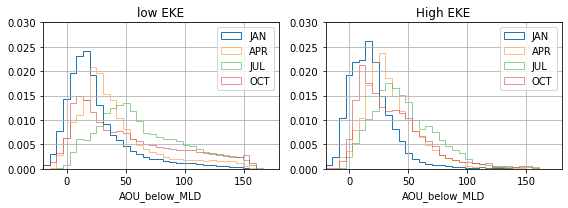

In [583]:
plt.figure(figsize=(8,3))
plt.subplot(121)
ds_AOU_ACC_low.AOU_below_MLD.where(ds_AOU_ACC_low.JULD.dt.month==1, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step',density=True, label='JAN');
ds_AOU_ACC_low.AOU_below_MLD.where(ds_AOU_ACC_low.JULD.dt.month==4,
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='APR');
ds_AOU_ACC_low.AOU_below_MLD.where(ds_AOU_ACC_low.JULD.dt.month==7, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='JUL');
ds_AOU_ACC_low.AOU_below_MLD.where(ds_AOU_ACC_low.JULD.dt.month==10, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='OCT');
plt.legend()
plt.title('low EKE')
plt.xlim([-20,180])
plt.ylim([0, 0.03])
plt.grid()

plt.subplot(122)
ds_AOU_ACC_high.AOU_below_MLD.where(ds_AOU_ACC_high.JULD.dt.month==1, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, label='JAN');
ds_AOU_ACC_high.AOU_below_MLD.where(ds_AOU_ACC_high.JULD.dt.month==4,
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='APR');
ds_AOU_ACC_high.AOU_below_MLD.where(ds_AOU_ACC_high.JULD.dt.month==7, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step',density=True,  alpha=0.5, label='JUL');
ds_AOU_ACC_high.AOU_below_MLD.where(ds_AOU_ACC_high.JULD.dt.month==10, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='OCT');
plt.legend()
plt.title('High EKE')
plt.xlim([-20,180])
plt.ylim([0, 0.03])
plt.grid()

plt.tight_layout()

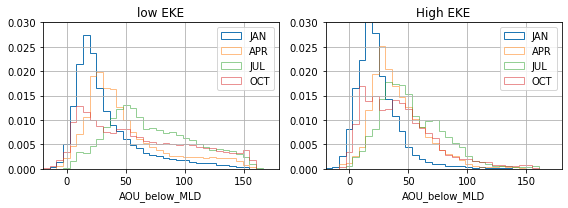

In [585]:
plt.figure(figsize=(8,3))
plt.subplot(121)
ds_AOU_ACC_low.AOU_below_MLD.isel(PRES_BL=slice(20,75)).where(ds_AOU_ACC_low.JULD.dt.month==1, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step',density=True, label='JAN');
ds_AOU_ACC_low.AOU_below_MLD.isel(PRES_BL=slice(20,75)).where(ds_AOU_ACC_low.JULD.dt.month==4,
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='APR');
ds_AOU_ACC_low.AOU_below_MLD.isel(PRES_BL=slice(20,75)).where(ds_AOU_ACC_low.JULD.dt.month==7, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='JUL');
ds_AOU_ACC_low.AOU_below_MLD.isel(PRES_BL=slice(20,75)).where(ds_AOU_ACC_low.JULD.dt.month==10, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='OCT');
plt.legend()
plt.title('low EKE')
plt.xlim([-20,180])
plt.ylim([0, 0.03])
plt.grid()

plt.subplot(122)
ds_AOU_ACC_high.AOU_below_MLD.isel(PRES_BL=slice(20,150)).where(ds_AOU_ACC_high.JULD.dt.month==1, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, label='JAN');
ds_AOU_ACC_high.AOU_below_MLD.isel(PRES_BL=slice(20,150)).where(ds_AOU_ACC_high.JULD.dt.month==4,
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='APR');
ds_AOU_ACC_high.AOU_below_MLD.isel(PRES_BL=slice(20,150)).where(ds_AOU_ACC_high.JULD.dt.month==7, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step',density=True,  alpha=0.5, label='JUL');
ds_AOU_ACC_high.AOU_below_MLD.isel(PRES_BL=slice(20,150)).where(ds_AOU_ACC_high.JULD.dt.month==10, 
                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='OCT');
plt.legend()
plt.title('High EKE')
plt.xlim([-20,180])
plt.ylim([0, 0.03])
plt.grid()

plt.tight_layout()

In [716]:
AOU_bins = np.linspace(-20, 200,40)
AOU_hist_low = np.zeros((len(AOU_bins)-1, 12))
AOU_hist_high = np.zeros((len(AOU_bins)-1, 12))

MLD_bins = np.linspace(0,500, 30)
MLD_hist_low = np.zeros((len(MLD_bins)-1, 12))
MLD_hist_high = np.zeros((len(MLD_bins)-1, 12))


for n in range(1,13):
    AOU_hist_low[:,n-1],_ = np.histogram(ds_AOU_ACC_low.AOU_below_MLD.isel(PRES_BL=slice(20,150)).where(ds_AOU_ACC_low.JULD.dt.month==n, 
                          drop=True), bins=AOU_bins, density=True)
    AOU_hist_high[:,n-1],_ = np.histogram(ds_AOU_ACC_high.AOU_below_MLD.isel(PRES_BL=slice(20,150)).where(ds_AOU_ACC_high.JULD.dt.month==n, 
                          drop=True), bins=AOU_bins, density=True)
    
    MLD_hist_low[:,n-1],_ = np.histogram(ds_AOU_ACC_low.MLD.where(ds_AOU_ACC_low.JULD.dt.month==n, 
                          drop=True), bins=MLD_bins, density=True)
    MLD_hist_high[:,n-1],_ = np.histogram(ds_AOU_ACC_high.MLD.where(ds_AOU_ACC_high.JULD.dt.month==n, 
                          drop=True), bins=MLD_bins, density=True)
    
    
    
#    AOU_hist_low[:,n-1],_,_ = ds_AOU_ACC_low.AOU_below_MLD.isel(PRES_BL=slice(20,75)).where(ds_AOU_ACC_low.JULD.dt.month==n, 
#                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step', density=True, alpha=0.5, label='JUL');
#    AOU_hist_high[:,n-1],_,_ =ds_AOU_ACC_high.AOU_below_MLD.isel(PRES_BL=slice(20,75)).where(ds_AOU_ACC_high.JULD.dt.month==n, 
#                          drop=True).plot.hist(bins=np.linspace(-20, 200,40), histtype='step',density=True,  alpha=0.5, label='JUL');


In [717]:
AOU_axis = 0.5*(AOU_bins[0:-1] + AOU_bins[1:])
MLD_axis = 0.5*(MLD_bins[0:-1] + MLD_bins[1:])
Months = np.linspace(1,12,12)

In [718]:
AOU_hist_low_xr = xr.DataArray(AOU_hist_low.T, dims=['month','AOU'],
                              coords={'month':Months, 'AOU':AOU_axis})
AOU_hist_high_xr = xr.DataArray(AOU_hist_high.T, dims=['month','AOU'],
                              coords={'month':Months, 'AOU':AOU_axis})

MLD_hist_low_xr = xr.DataArray(MLD_hist_low.T, dims=['month','MLD'],
                              coords={'month':Months, 'MLD':MLD_axis})
MLD_hist_high_xr = xr.DataArray(MLD_hist_high.T, dims=['month','MLD'],
                              coords={'month':Months, 'MLD':MLD_axis})


Text(0.5, 1.0, 'High EKE')

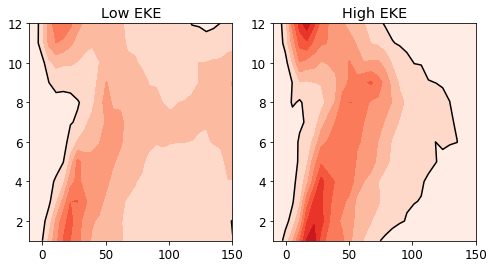

In [719]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.contourf(AOU_axis, Months, AOU_hist_low_xr, cmap='Reds', levels=np.linspace(0,0.03,11))
plt.contour(AOU_axis, Months, AOU_hist_low_xr, colors='k', levels=[0.003])
plt.xlim([-10,150])
plt.title('Low EKE')

plt.subplot(122)
plt.contourf(AOU_axis, Months, AOU_hist_high_xr, cmap='Reds', levels=np.linspace(0,0.03,11))
plt.contour(AOU_axis, Months, AOU_hist_high_xr, colors='k', levels=[0.003])
plt.xlim([-10,150])
plt.title('High EKE')

Text(0.5, 1.0, 'High EKE')

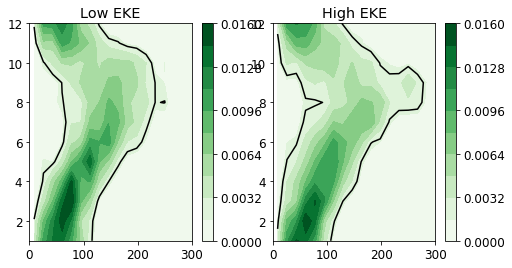

In [720]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.contourf(MLD_axis, Months, MLD_hist_low_xr, cmap='Greens', levels= np.linspace(0, 0.016, 11))
plt.colorbar()
plt.contour(MLD_axis, Months, MLD_hist_low_xr, colors='k', levels=[0.002])
plt.xlim([0,300])
plt.title('Low EKE')

plt.subplot(122)
plt.contourf(MLD_axis, Months, MLD_hist_high_xr, cmap='Greens', levels=np.linspace(0,0.016,11))
plt.colorbar()

plt.contour(MLD_axis, Months, MLD_hist_high_xr, colors='k', levels=[0.002])
plt.xlim([0,300])
plt.title('High EKE')

In [721]:
def hist_mean(ds, var='MLD'):
    return ((ds*ds[var]).sum(var)/(ds).sum(var))

In [722]:
MLD_mean_high = hist_mean(MLD_hist_high_xr, 'MLD')
MLD_mean_low = hist_mean(MLD_hist_low_xr, 'MLD')

AOU_mean_high = hist_mean(AOU_hist_high_xr, 'AOU')
AOU_mean_low = hist_mean(AOU_hist_low_xr, 'AOU')

In [723]:
import matplotlib

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

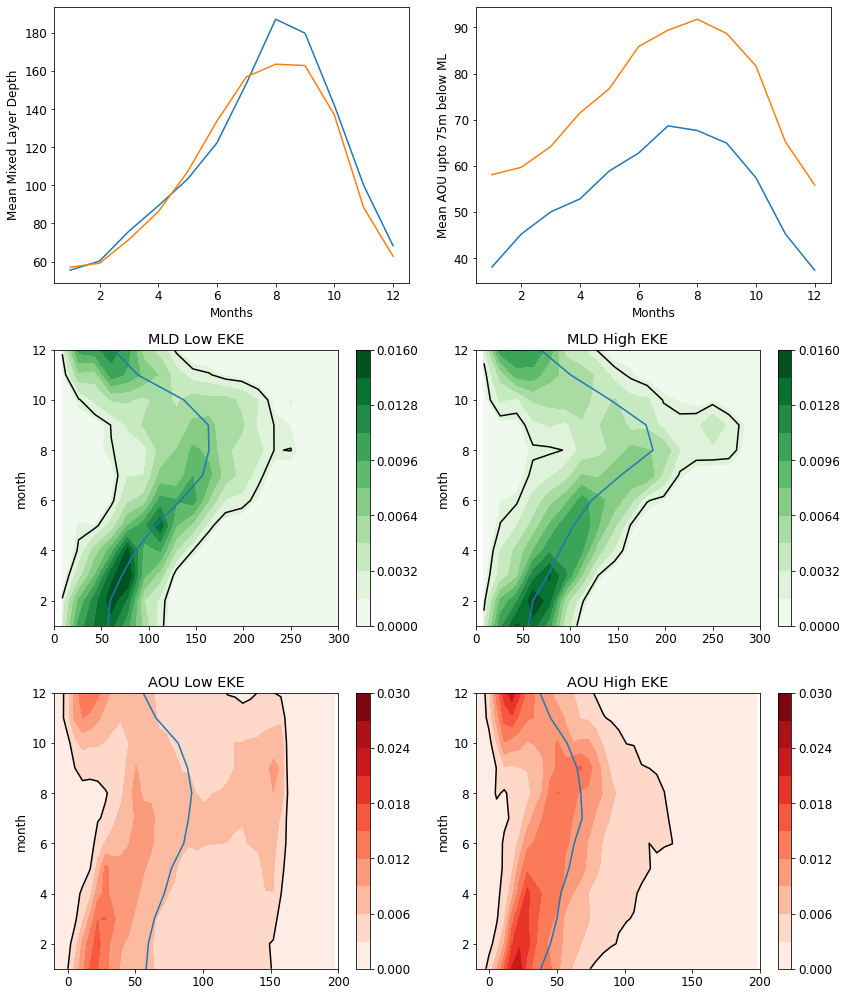

In [725]:
plt.figure(figsize=(12,14))

plt.subplot(321)
MLD_mean_high.plot()
MLD_mean_low.plot()
plt.ylabel('Mean Mixed Layer Depth')
plt.xlabel('Months')

plt.subplot(322)
AOU_mean_high.plot()
AOU_mean_low.plot()
plt.ylabel('Mean AOU upto 75m below ML')
plt.xlabel('Months')

plt.subplot(323)
plt.contourf(MLD_axis, Months, MLD_hist_low_xr, cmap='Greens', levels= np.linspace(0, 0.016, 11))
plt.colorbar()
plt.contour(MLD_axis, Months, MLD_hist_low_xr, colors='k', levels=[0.002])
MLD_mean_low.plot(y='month')
plt.xlim([0,300])
plt.title('MLD Low EKE')

plt.subplot(324)
plt.contourf(MLD_axis, Months, MLD_hist_high_xr, cmap='Greens', levels=np.linspace(0,0.016,11))
plt.colorbar()
plt.contour(MLD_axis, Months, MLD_hist_high_xr, colors='k', levels=[0.002])
MLD_mean_high.plot(y='month')
plt.xlim([0,300])
plt.title('MLD High EKE')

plt.subplot(325)
plt.contourf(AOU_axis, Months, AOU_hist_low_xr, cmap='Reds', levels=np.linspace(0,0.03,11))
plt.colorbar()
plt.contour(AOU_axis, Months, AOU_hist_low_xr, colors='k', levels=[0.003])
AOU_mean_low.plot(y='month')
plt.xlim([-10,200])
plt.title('AOU Low EKE')

plt.subplot(326)
plt.contourf(AOU_axis, Months, AOU_hist_high_xr, cmap='Reds', levels=np.linspace(0,0.03,11))
plt.colorbar()
plt.contour(AOU_axis, Months, AOU_hist_high_xr, colors='k', levels=[0.003])
AOU_mean_high.plot(y='month')
plt.xlim([-10,200])
plt.title('AOU High EKE')

plt.tight_layout()

plt.savefig('eke_1_75.png')

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0401e+04]),
 array([-6115.43974943, -5487.19960437, -4858.95945931, -4230.71931425,
        -3602.47916919, -2974.23902413, -2345.99887907, -1717.75873401,
        -1089.51858895,  -461.27844389,   166.96170117]),
 <a list of 10 Patch objects>)

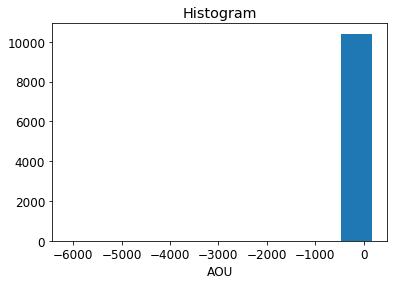

In [765]:
ds_AOU_ACC_low.AOU.sel(PRES=400, method='nearest').plot.hist()

(array([  70.,  443., 1120., 1742., 1526.,  829.,  918.,  886.,  462.,
           2.]),
 array([ -5.58823531,  14.04716592,  33.68256716,  53.31796839,
         72.95336962,  92.58877085, 112.22417209, 131.85957332,
        151.49497455, 171.13037578, 190.76577702]),
 <a list of 10 Patch objects>)

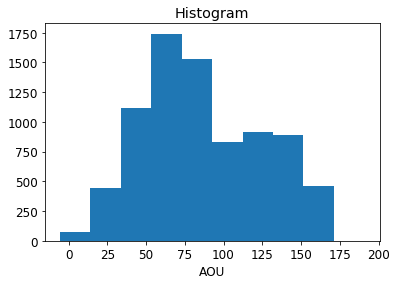

In [766]:
ds_AOU_ACC_high.AOU.sel(PRES=400, method='nearest').plot.hist()

In [763]:
ds_AOU_ACC_high

<xarray.Dataset>
Dimensions:        (N_PROF: 8930, PRES: 1001, PRES_BL: 125)
Coordinates:
  * PRES           (PRES) float64 0.0 2.0 4.0 6.0 ... 1.996e+03 1.998e+03 2e+03
Dimensions without coordinates: N_PROF, PRES_BL
Data variables:
    PLATFORM_NUM   (N_PROF) object b'5903256 ' b'1901339 ' ... b'5903248 '
    JULD           (N_PROF) datetime64[ns] 2012-05-08T16:37:39.999999488 ... 2011-12-15T07:05:49.000024832
    LONGITUDE      (N_PROF) float64 -142.1 81.41 -148.5 ... -147.3 -150.0 175.4
    PSAL           (N_PROF, PRES) float64 nan nan nan 34.14 ... nan nan nan nan
    TEMP           (N_PROF, PRES) float64 nan nan nan 7.559 ... nan nan nan nan
    LATITUDE       (N_PROF) float64 -52.35 -48.46 -53.08 ... -52.84 -52.38
    DOXY           (N_PROF, PRES) float64 nan nan nan 289.3 ... nan nan nan nan
    SA             (N_PROF, PRES) float64 nan nan nan 34.3 ... nan nan nan nan
    CT             (N_PROF, PRES) float64 nan nan nan 7.563 ... nan nan nan nan
    sigma0         (N_PROF, PRES) float64 nan nan nan 26.66 ... nan nan nan nan
    O2sat          (N_PROF, PRES) float64 nan nan nan 291.6 ... nan nan nan nan
    AOU            (N_PROF, PRES) float64 nan nan nan 2.285 ... nan nan nan nan
    ADT            (N_PROF) float64 0.1072 -0.4376 0.1199 ... 0.119 0.06198
    EKE            (N_PROF) float64 0.03215 0.03052 0.02778 ... 0.03176 0.0189
    MLD            (N_PROF) float64 106.0 52.0 120.0 106.0 ... 72.0 88.0 16.0
    AOU_below_MLD  (N_PROF, PRES_BL) float64 8.106 8.728 9.598 ... 17.22 18.0

In [772]:
low_var  = ds_AOU_ACC_low.AOU.where(ds_AOU_ACC_low.AOU>-100, drop=True).var('N_PROF')
high_var = ds_AOU_ACC_high.AOU.var('N_PROF')


low_mean  = ds_AOU_ACC_low.AOU.where(ds_AOU_ACC_low.AOU>-100, drop=True).mean('N_PROF')
high_mean = ds_AOU_ACC_high.AOU.mean('N_PROF')


/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [785]:
high_var2 = ds_AOU_ACC_high.AOU.where(ds_AOU_ACC_high.JULD.dt.month==3, 
                          drop=True).var('N_PROF')
high_var8 = ds_AOU_ACC_high.AOU.where(ds_AOU_ACC_high.JULD.dt.month==9, 
                          drop=True).var('N_PROF')

high_mean2 = ds_AOU_ACC_high.AOU.where(ds_AOU_ACC_high.JULD.dt.month==2, 
                          drop=True).mean('N_PROF')
high_mean8 = ds_AOU_ACC_high.AOU.where(ds_AOU_ACC_high.JULD.dt.month==8, 
                          drop=True).mean('N_PROF')

/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nputil

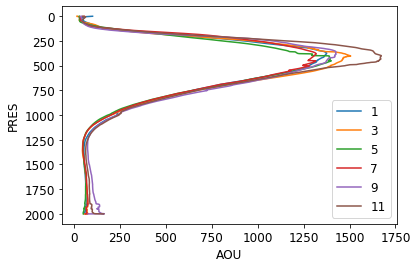

In [791]:
for n in range(1,13,2):
    ds_AOU_ACC_high.AOU.where(ds_AOU_ACC_high.JULD.dt.month==n, 
                          drop=True).var('N_PROF').plot(y='PRES', label=n)
    
plt.gca().invert_yaxis()
plt.legend()

/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/dhruvbalwada/code/miniconda/envs/

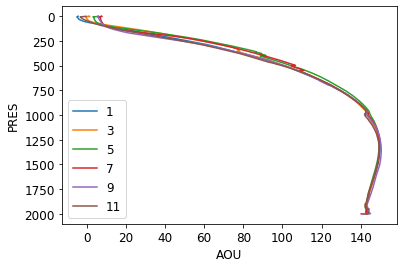

In [792]:
for n in range(1,13,2):
    ds_AOU_ACC_high.AOU.where(ds_AOU_ACC_high.JULD.dt.month==n, 
                          drop=True).mean('N_PROF').plot(y='PRES', label=n)
    
plt.gca().invert_yaxis()
plt.legend()

Text(0.5, 0, 'AOU_STD')

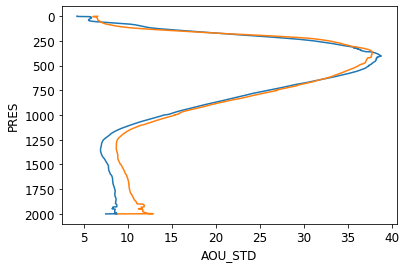

In [786]:
(high_var2**0.5).plot(y='PRES')
(high_var8**0.5).plot(y='PRES')

plt.gca().invert_yaxis()
plt.xlabel('AOU_STD')

Text(0.5, 0, 'AOU_STD')

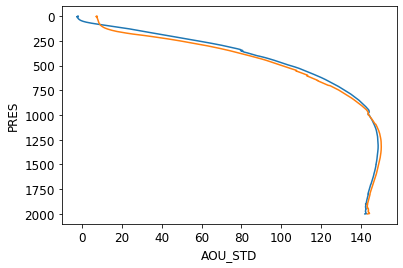

In [784]:
high_mean2.plot(y='PRES')
high_mean8.plot(y='PRES')

plt.gca().invert_yaxis()
plt.xlabel('AOU_STD')

Text(0.5, 0, 'AOU_STD')

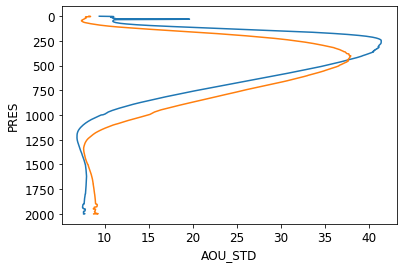

In [779]:
(low_var**0.5).plot(y='PRES')
(high_var**0.5).plot(y='PRES')

plt.gca().invert_yaxis()
plt.xlabel('AOU_STD')

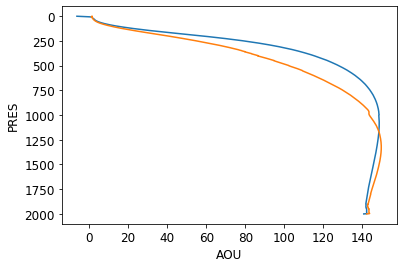

In [777]:
low_mean.plot(y='PRES')
high_mean.plot(y='PRES')

plt.gca().invert_yaxis()

### Vertical stratification

In [753]:
from xgcm import Grid
from xgcm.autogenerate import generate_grid_ds

ModuleNotFoundError: No module named 'xgcm'

In [748]:
temp = ds_AOU_ACC.isel(N_PROF=0).sigma0

/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


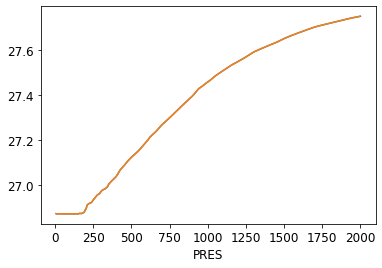

In [751]:
temp.plot()
temp.rolling(PRES=5, center='True').mean().plot()

/Users/dhruvbalwada/code/miniconda/envs/holoviz-sogos/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


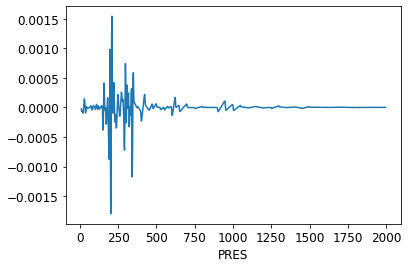

In [752]:
(temp - temp.rolling(PRES=5, center='True').mean()).plot()

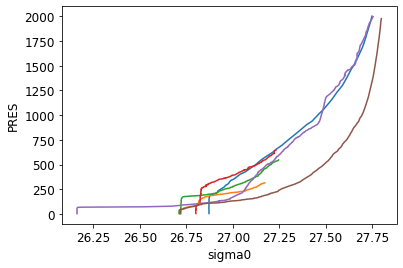

In [737]:
ds_AOU_ACC.isel(N_PROF=0).sigma0.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=100).sigma0.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=200).sigma0.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=300).sigma0.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=400).sigma0.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=500).sigma0.plot(y='PRES')

(0, 150)

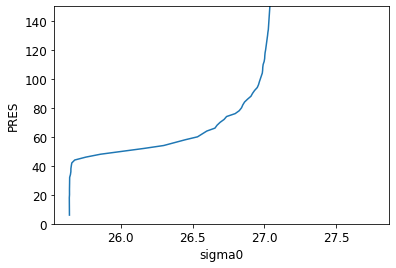

In [747]:
ds_AOU_ACC.isel(N_PROF=20000).sigma0.plot(y='PRES')
plt.ylim([0, 150])

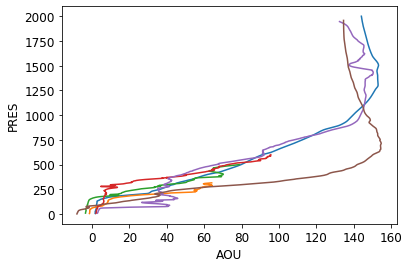

In [738]:
ds_AOU_ACC.isel(N_PROF=0).AOU.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=100).AOU.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=200).AOU.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=300).AOU.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=400).AOU.plot(y='PRES')
ds_AOU_ACC.isel(N_PROF=500).AOU.plot(y='PRES')

In [733]:
ds_AOU_ACC.isel(N_PROF=100).LATITUDE

<xarray.DataArray 'LATITUDE' ()>
array(-46.352)
Attributes:
    long_name:      Latitude of the station, best estimate
    standard_name:  latitude
    units:          degree_north
    valid_min:      -90.0
    valid_max:      90.0
    axis:           Y